<font size = 5><b> Loi normale :</b><font>

In [1]:
import pandas as pd
import numpy as np
import math
from math import pi
from math import e
from math import sqrt
from math import log
from math import exp
import matplotlib
import matplotlib.pyplot as plt
import scipy
import scipy.stats as stats
from random import random

In [2]:
male_heights = pd.read_csv("Male Heights.csv", sep=";", index_col=None)

In [3]:
male_heights.head()

,Gender,Height (in),Height (cm)
0,Male,"73,847017","187,571423"
1,Male,"68,781904","174,706036"
2,Male,"74,110105","188,239668"
3,Male,"71,730978","182,196685"
4,Male,"69,881796","177,499761"


In [4]:
male_heights = male_heights.apply(lambda x: x.str.replace(',','.'))

In [5]:
heights_in = pd.to_numeric(male_heights["Height (in)"], downcast="float")
heights_cm = pd.to_numeric(male_heights["Height (cm)"], downcast="float")

In [6]:
heights_cm = pd.DataFrame(heights_cm)
heights_cm.columns = ["Height (cm)"]

In [7]:
heights_cm.head()

,Height (cm)
0,187.571426
1,174.706039
2,188.239670
3,182.196686
4,177.499756


In [8]:
mu = float(heights_cm.mean())
sigma = float(heights_cm.std())
minimum = float(heights_cm.min())
maximum = float(heights_cm.max())
step = (maximum - minimum) / 20

In [9]:
mu, sigma, minimum, maximum, step

(175.32666015625,
 7.272939205169678,
 148.35354614257812,
 200.65679931640625,
 2.615162658691406)

In [10]:
distribution = heights_cm["Height (cm)"].groupby(pd.cut(heights_cm["Height (cm)"], np.arange(minimum, 1 + maximum, step))).count()

In [11]:
distribution = pd.DataFrame(distribution)

In [12]:
distribution.head()

,Height (cm)
Height (cm),
"(148.354, 150.969]",1
"(150.969, 153.584]",8
"(153.584, 156.199]",21
"(156.199, 158.814]",43
"(158.814, 161.429]",74


In [13]:
distribution.columns = ["Frequency"]
distribution.reset_index()

,Height (cm),Frequency
0,"(148.354, 150.969]",1
1,"(150.969, 153.584]",8
2,"(153.584, 156.199]",21
3,"(156.199, 158.814]",43
4,"(158.814, 161.429]",74
5,"(161.429, 164.045]",147
6,"(164.045, 166.66]",285
7,"(166.66, 169.275]",402
8,"(169.275, 171.89]",580
9,"(171.89, 174.505]",710


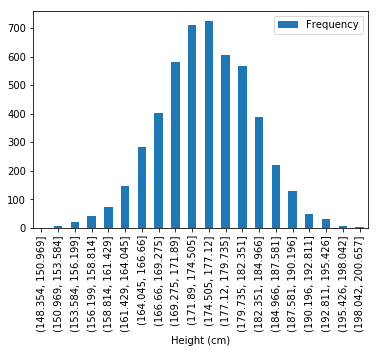

In [14]:
my_plot1 = distribution.plot.bar()

In [15]:
centered_heights_cm = [(x - mu)/sigma for x in heights_cm["Height (cm)"]] 

In [16]:
centered_heights_cm = pd.DataFrame(centered_heights_cm)
centered_heights_cm.columns = ["Height (cm) centered"]

In [17]:
centered_heights_cm.head()

,Height (cm) centered
0,1.683606
1,-0.085333
2,1.775487
3,0.944601
4,0.298792


In [18]:
mu_centered = float(centered_heights_cm.mean())
sigma_centered = float(centered_heights_cm.std())
minimum_centered = float(centered_heights_cm.min())
maximum_centered = float(centered_heights_cm.max())
step_centered = (maximum_centered - minimum_centered) / 20

In [19]:
mu_centered, sigma_centered, minimum_centered, maximum_centered, step_centered

(3.553084784557206e-05,
 1.0000001128462612,
 -3.708695102868331,
 3.4827926434681777,
 0.35957438731682545)

In [20]:
centered_distrib = centered_heights_cm["Height (cm) centered"].groupby(pd.cut(centered_heights_cm["Height (cm) centered"], np.arange(minimum_centered, maximum_centered + step_centered, step_centered))).count()

In [21]:
centered_distrib = pd.DataFrame(centered_distrib)

In [22]:
centered_distrib.head()

,Height (cm) centered
Height (cm) centered,
"(-3.709, -3.349]",1
"(-3.349, -2.99]",8
"(-2.99, -2.63]",21
"(-2.63, -2.27]",43
"(-2.27, -1.911]",74


In [23]:
centered_distrib.columns = ["Frequency"]
centered_distrib.reset_index()

,Height (cm) centered,Frequency
0,"(-3.709, -3.349]",1
1,"(-3.349, -2.99]",8
2,"(-2.99, -2.63]",21
3,"(-2.63, -2.27]",43
4,"(-2.27, -1.911]",74
5,"(-1.911, -1.551]",147
6,"(-1.551, -1.192]",285
7,"(-1.192, -0.832]",402
8,"(-0.832, -0.473]",580
9,"(-0.473, -0.113]",710


In [24]:
centered_distrib.reset_index()

,Height (cm) centered,Frequency
0,"(-3.709, -3.349]",1
1,"(-3.349, -2.99]",8
2,"(-2.99, -2.63]",21
3,"(-2.63, -2.27]",43
4,"(-2.27, -1.911]",74
5,"(-1.911, -1.551]",147
6,"(-1.551, -1.192]",285
7,"(-1.192, -0.832]",402
8,"(-0.832, -0.473]",580
9,"(-0.473, -0.113]",710


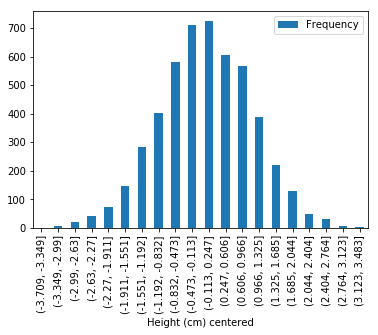

In [25]:
my_plot2 = centered_distrib.plot.bar()

In [26]:
sorted_heights_cm = heights_cm.sort_values(by = "Height (cm)")

In [27]:
sorted_heights_cm = pd.DataFrame(sorted_heights_cm)

In [28]:
sorted_heights_cm.head()

,Height (cm)
4794,148.353546
2334,150.826843
4637,152.064911
2191,152.244171
1942,152.353943


In [29]:
heights_cm_Z = [stats.norm.cdf(x, mu, sigma) for x in sorted_heights_cm["Height (cm)"]]

In [30]:
heights_cm_Z = pd.DataFrame(heights_cm_Z)
heights_cm_Z.columns = ["Z"]

In [31]:
heights_cm_Z.head()

,Z
0,0.000104
1,0.000378
2,0.000691
3,0.000752
4,0.000792


In [32]:
sorted_heights_cm.reset_index(drop = True, inplace = True)

In [33]:
sorted_heights_cm.head()

,Height (cm)
0,148.353546
1,150.826843
2,152.064911
3,152.244171
4,152.353943


In [34]:
heights_cm_Z.reset_index(drop = True, inplace = True)

In [35]:
heights_cm_Z.head()

,Z
0,0.000104
1,0.000378
2,0.000691
3,0.000752
4,0.000792


In [36]:
repartition = pd.DataFrame(sorted_heights_cm)

In [37]:
repartition.head()

,Height (cm)
0,148.353546
1,150.826843
2,152.064911
3,152.244171
4,152.353943


In [38]:
repartition["Z"] = heights_cm_Z["Z"].values

In [39]:
repartition.head()

,Height (cm),Z
0,148.353546,0.000104
1,150.826843,0.000378
2,152.064911,0.000691
3,152.244171,0.000752
4,152.353943,0.000792


In [40]:
repartition.tail()

,Height (cm),Z
4995,198.363510,0.999231
4996,199.293610,0.999509
4997,199.461655,0.999547
4998,199.698288,0.999597
4999,200.656799,0.999752


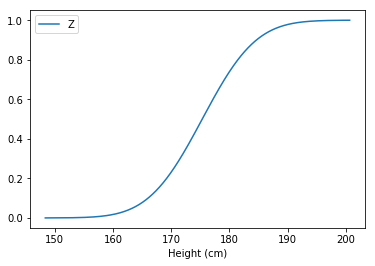

In [41]:
my_plot3 = repartition.plot.line(x = "Height (cm)", y = "Z")